**INSTRUCTIONS**

1. Import pandas and sqlite3.
2. Connect to factbook.db and use pandas.read_sql_query() to return information on the tables in the database.
3. Write and run another query that returns the first 5 rows of the facts table in the database.

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect("factbook.db")

In [3]:
q = "SELECT * FROM sqlite_master WHERE type = 'table'; "
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [4]:
q1 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q1,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


**INSTRUCTIONS**

1. Write a single query that returns the:
- minimum population
- maximum population
- minimum population growth
- maximum population growth

In [5]:
q2 = "SELECT MAX(population), MIN(population), MAX(population_growth), MIN(population_growth) FROM facts"
pd.read_sql_query(q2,conn)

,MAX(population),MIN(population),MAX(population_growth),MIN(population_growth)
0,7256490011,0,4.02,0.0


**INSTRUCTIONS**

1. Write a query that returns the countrie(s) with a population of 0.
2. Write a query that returns the countrie(s) with a population of 7256490011.
3. In a markdown cell, type up your observations on these rows.

In [6]:
q3 = "SELECT name FROM facts WHERE population = 0"
pd.read_sql_query(q3,conn)

,name
0,Antarctica


In [7]:
q4 = "SELECT name FROM facts WHERE population = 7256490011"
pd.read_sql_query(q4,conn)

,name
0,World


**COMMENT**

The 0 population of Antartica makes sense.  The db provides an entry for the entire world.

**INSTRUCTIONS**
Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns:
1. population
2. population_growth
3. birth_rate
4. death_rate

In [8]:
q5 = ("""SELECT population, population_growth, birth_rate, death_rate FROM facts
      WHERE ((population) > 0) AND (population < 7256490011)""")

my_df = pd.read_sql_query(q5,conn)

In [9]:
my_df.head(3)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31


In [10]:
from numpy import arange
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

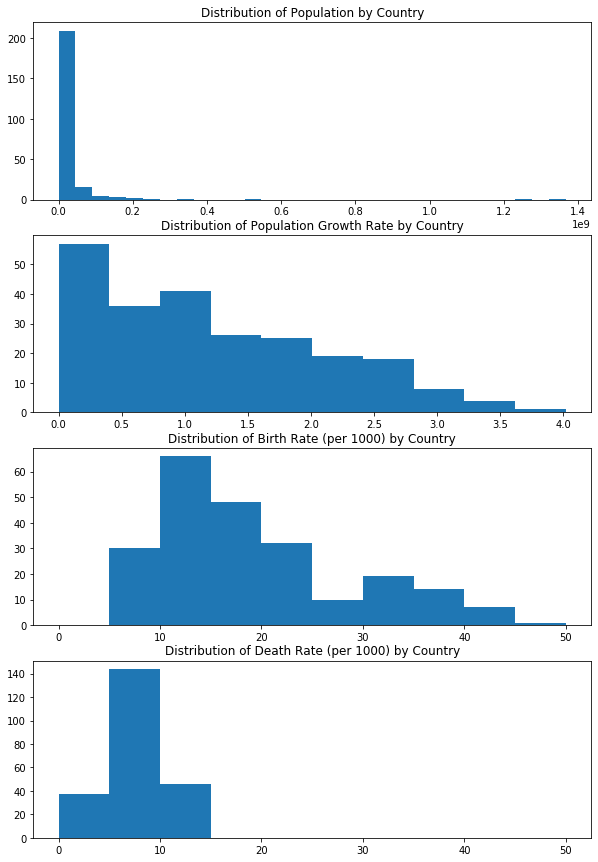

In [13]:
fig = plt.figure(figsize = (10,15))
ax1 = fig.add_subplot(4,1,1) #population
ax2 = fig.add_subplot(4,1,2) #population_growth
ax3 = fig.add_subplot(4,1,3) #birth_rate
ax4 = fig.add_subplot(4,1,4) #death_rate

ax1.hist(my_df['population'], bins = 30)
ax1.set_title("Distribution of Population by Country")

ax2.hist(my_df['population_growth'], bins = 10)
ax2.set_title("Distribution of Population Growth Rate by Country")

ax3.hist(my_df['birth_rate'], bins = 10, range = (0,50))
ax3.set_title("Distribution of Birth Rate (per 1000) by Country")

ax4.hist(my_df['death_rate'], bins = 10, range = (0,50))
ax4.set_title("Distribution of Death Rate (per 1000) by Country")

plt.show()

NOTE: Population, population growth and birth rate all skew positive, with population having two significant outliers (must be China and India).